<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Collinearity-and-Removing-Redundancies" data-toc-modified-id="Collinearity-and-Removing-Redundancies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Collinearity and Removing Redundancies</a></span><ul class="toc-item"><li><span><a href="#functions-to-test-correlation" data-toc-modified-id="functions-to-test-correlation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions to test correlation</a></span></li><li><span><a href="#Creating-Features" data-toc-modified-id="Creating-Features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating Features</a></span></li><li><span><a href="#Creating-dummy-variables" data-toc-modified-id="Creating-dummy-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating dummy variables</a></span><ul class="toc-item"><li><span><a href="#encoding-the-columns" data-toc-modified-id="encoding-the-columns-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>encoding the <code>columns</code></a></span></li></ul></li><li><span><a href="#Checking-the-correlated-values" data-toc-modified-id="Checking-the-correlated-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Checking the correlated values</a></span></li><li><span><a href="#Checking-the-correlated-values" data-toc-modified-id="Checking-the-correlated-values-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Checking the correlated values</a></span></li></ul></li><li><span><a href="#Featuring-Engineering" data-toc-modified-id="Featuring-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Featuring Engineering</a></span></li><li><span><a href="#Multicollinearity-Checking" data-toc-modified-id="Multicollinearity-Checking-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>Multicollinearity</code> Checking</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#NOTE" data-toc-modified-id="NOTE-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>NOTE</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#important-features-using-Random-Forest" data-toc-modified-id="important-features-using-Random-Forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>important features using <code>Random-Forest</code></a></span></li><li><span><a href="#impotant-features-using-PCA" data-toc-modified-id="impotant-features-using-PCA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>impotant features using <code>PCA</code></a></span></li><li><span><a href="#Min-Max-Scaler,-StandardScaler-to-scale-the-data" data-toc-modified-id="Min-Max-Scaler,-StandardScaler-to-scale-the-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><code>Min-Max Scaler</code>, <code>StandardScaler</code> to scale the data</a></span></li></ul></li><li><span><a href="#Applying-Machine-Learning-models-for-prediction" data-toc-modified-id="Applying-Machine-Learning-models-for-prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Applying Machine Learning models for <code>prediction</code></a></span></li><li><span><a href="#changing-the-peoblem-due-to-high-error-in-current-model" data-toc-modified-id="changing-the-peoblem-due-to-high-error-in-current-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>changing the peoblem due to high error in current model</a></span><ul class="toc-item"><li><span><a href="#Choose-the-best-performance-model-and-extract-the-prep-duration-predictions" data-toc-modified-id="Choose-the-best-performance-model-and-extract-the-prep-duration-predictions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Choose the best performance model and extract the <code>prep-duration</code> predictions</a></span></li><li><span><a href="#using-another-regression-model-for-prediction" data-toc-modified-id="using-another-regression-model-for-prediction-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>using another regression model for prediction</a></span></li></ul></li><li><span><a href="#deep-learning-models-for-the-task" data-toc-modified-id="deep-learning-models-for-the-task-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><code>deep-learning</code> models for the task</a></span><ul class="toc-item"><li><span><a href="#applying-the-model-for-task" data-toc-modified-id="applying-the-model-for-task-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>applying the model for task</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Collinearity and Removing Redundancies

`Collinearity` means the variables are correlated with each other, that is the variables have the same effects on the model.

**Easiest way to remove** : 

      Draw a correlation matrix, a heatmap that will visually represent the correlation coefficients between the variables.

In [111]:
## loading packages and data

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import random
import math

In [112]:
pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_columns', 100)

In [113]:
## loading data

data = pd.read_csv("Data/clean_historical_data.csv")
data.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,busy_dashers_ratio,total_non_prep_time,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,category_breakfast,category_british,category_bubble-tea,category_burger,category_burmese,category_cafe,category_cajun,category_caribbean,category_catering,category_cheese,category_chinese,category_chocolate,category_comfort-food,category_convenience-store,category_dessert,category_dim-sum,category_ethiopian,category_european,category_fast,category_filipino,category_french,category_gastropub,category_german,category_gluten-free,category_greek,category_hawaiian,category_indian,category_indonesian,category_irish,category_italian,category_japanese,category_korean,category_kosher,category_latin-american,category_lebanese,category_malaysian,category_mediterranean,category_mexican,category_middle-eastern,category_moroccan,category_nepalese,category_other,category_pakistani,category_pasta,category_persian,category_peruvian,category_pizza,category_russian,category_salad,category_sandwich,category_seafood,category_singaporean,category_smoothie,category_soup,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,42.424244,1307.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,200.000000,1136.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,0.000000,1136.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,100.000000,735.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,100.000000,1096.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
## laoding the historical data

historical_data = pd.read_csv("Data/historical_data.csv")
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,06-02-2015 22:24,06-02-2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [115]:
data.shape

(177077, 99)

In [116]:
## plotting collinearity plot

## generate a mask for the upper triangle
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

In [117]:
# mask

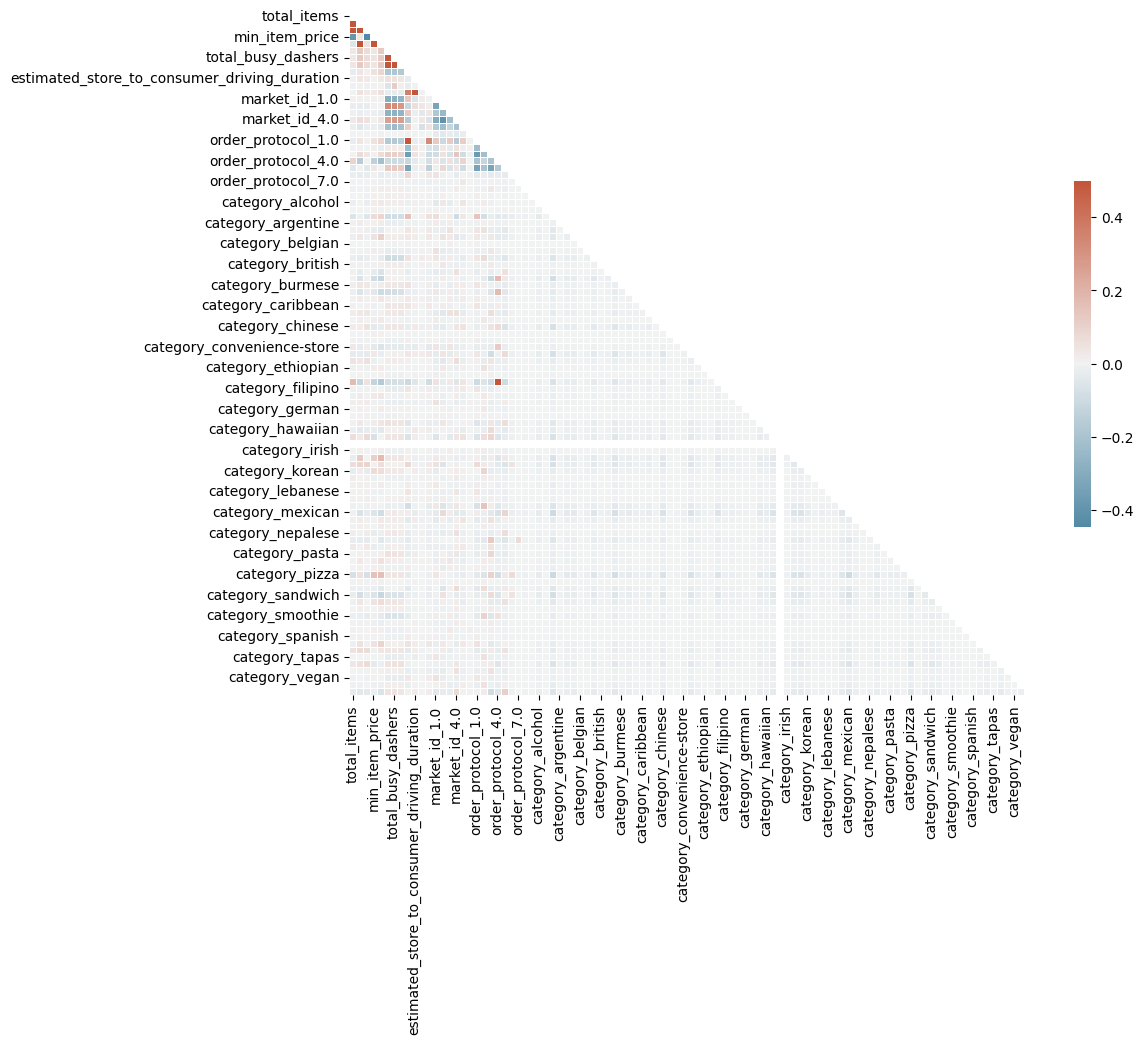

In [118]:
## setup the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

## generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True) 

## draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})
plt.show()

In [119]:
## observing the null issues

data['category_hawaiian'].describe()

count    177077.000000
mean          0.008290
std           0.090672
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: category_hawaiian, dtype: float64

### functions to test correlation

* 1. GET REDUNDANT VALUES
* 2. FIND THE TOP CORRELATED FEATURES


In [120]:
## creating redundant pairs

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of the matrix'''
    ## creating set variable to store the data
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [121]:
## testing the function, 

len(get_redundant_pairs(df = data))

4950

In [122]:
# get_redundant_pairs(df = data)

In [123]:
## creating find the top correlated features

def get_top_abs_corr_features(df, n):
    '''Get the top absolute correlated features and return n highest results'''
    ## unstacking the correlation value and only considering absolute values
    data_corr = data.corr().abs().unstack()
    ## getting the pairs
    labels_to_drop = get_redundant_pairs(df)
    ## finally sorting in desceding order and dropping the redudant pairs
    data_corr = data_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
    return data_corr[0:n] 

In [124]:
# data.corr().abs().unstack()

In [125]:
get_top_abs_corr_features(df = data, n = 20) 

total_onshift_dashers                         total_busy_dashers          0.941744
                                              total_outstanding_orders    0.934642
total_busy_dashers                            total_outstanding_orders    0.931295
estimated_store_to_consumer_driving_duration  total_non_prep_time         0.923087
estimated_order_place_duration                order_protocol_1.0          0.897649
total_items                                   num_distinct_items          0.758153
subtotal                                      num_distinct_items          0.682892
total_items                                   subtotal                    0.557181
min_item_price                                max_item_price              0.541239
subtotal                                      max_item_price              0.507949
order_protocol_4.0                            category_fast               0.489986
num_distinct_items                            min_item_price              0.446735
mark

After the above result, 

**Conclusion** : 

1. `total_busy_dashers`, `total_onshift_dashers` and `total_outstanding_orders` are highly correlated as expected. 
2. `estimated_store_to_consumer_driving_duration` and `total_non_prep_time` are correlated and we have created the column, `total_non_prep_time`, so we will drop this.
3. `market_id` columns are correlated with each other. 


Now, we will created our `train_data` again from `historical_data` and concat with avaliable dummies to created new `data`.

In [126]:
## creating the new column

historical_data['total_non_prep_time'] = historical_data['estimated_order_place_duration'] + historical_data['estimated_store_to_consumer_driving_duration']
historical_data['total_non_prep_time']

0         1307.0
1         1136.0
2         1136.0
3          735.0
4         1096.0
           ...  
197423     582.0
197424    1166.0
197425    1046.0
197426     830.0
197427     580.0
Name: total_non_prep_time, Length: 197428, dtype: float64

In [127]:
historical_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_non_prep_time'],
      dtype='object')

In [128]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [129]:
## changing column types
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'], dayfirst = True)
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'], dayfirst = True)

### Creating Features

In [130]:
## creating traget_variable for the prediction in the historical_data

historical_data.loc[:, 'actual_total_delivery_duration'] = (historical_data.loc[:, 'actual_delivery_time'] - historical_data.loc[:, 'created_at']).dt.total_seconds()
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_non_prep_time,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:00,2015-02-06 23:27:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,1307.0,3780.0
1,2.0,2015-02-10 21:49:00,2015-02-10 22:56:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1136.0,4020.0
2,3.0,2015-01-22 20:39:00,2015-01-22 21:09:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1136.0,1800.0
3,3.0,2015-02-03 21:21:00,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,735.0,3120.0
4,3.0,2015-02-15 02:40:00,2015-02-15 03:20:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1096.0,2400.0


### Creating dummy variables

In [131]:
historical_data['market_id'].nunique()

6

In [132]:
historical_data['store_id'].nunique() 

6743

In [133]:
historical_data['store_primary_category'].nunique()

74

In [134]:
historical_data['order_protocol'].nunique() 

7

#### encoding the `columns`

In [135]:
## market_id column

market_id_dummies = pd.get_dummies(historical_data['market_id'])
market_id_dummies = market_id_dummies.add_prefix("market_id_")
market_id_dummies

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
197423,1,0,0,0,0,0
197424,1,0,0,0,0,0
197425,1,0,0,0,0,0
197426,1,0,0,0,0,0


In [136]:
## order_protocol columns

order_protocol_dummies = pd.get_dummies(historical_data['order_protocol'])
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
197423,0,0,0,1,0,0,0
197424,0,0,0,1,0,0,0
197425,0,0,0,1,0,0,0
197426,1,0,0,0,0,0,0


In [137]:
## store_primary_category has null values

## create a dictionary to store the most repeated category for each store and fill the null values with it

store_id_unique = historical_data['store_id'].unique().tolist()
# store_id_unique

store_id_and_category = {store_id : historical_data[historical_data['store_id'] == store_id]['store_primary_category'].mode()
                         for store_id in store_id_unique}
"""For each store_id, in the list store_id_unique, it's comapring with and then whenever it matches, 
   storing the most common store_primary_category"""

# store_id_and_category[1851].values[0]

"For each store_id, in the list store_id_unique, it's comapring with and then whenever it matches, \n   storing the most common store_primary_category"

In [138]:
## creating a function to fill the null values in the store_primary_category column

def fill(store_id):
    """Return primary store category from the column"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
    
## fill the null values
historical_data['store_primary_category_updated'] = historical_data['store_id'].apply(fill)

In [139]:
## checking

historical_data[['store_primary_category_updated', 'store_primary_category']].isnull().sum()

store_primary_category_updated     867
store_primary_category            4760
dtype: int64

In [140]:
## encoding the store_primary_category_updated column 

historical_data['store_primary_category_updated'].nunique()

74

In [141]:
## one hot encoding

store_primary_category_dummies = pd.get_dummies(historical_data['store_primary_category_updated'])
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,category_breakfast,category_british,category_bubble-tea,category_burger,category_burmese,category_cafe,category_cajun,category_caribbean,category_catering,category_cheese,category_chinese,category_chocolate,category_comfort-food,category_convenience-store,category_dessert,category_dim-sum,category_ethiopian,category_european,category_fast,category_filipino,category_french,category_gastropub,category_german,category_gluten-free,category_greek,category_hawaiian,category_indian,category_indonesian,category_irish,category_italian,category_japanese,category_korean,category_kosher,category_latin-american,category_lebanese,category_malaysian,category_mediterranean,category_mexican,category_middle-eastern,category_moroccan,category_nepalese,category_other,category_pakistani,category_pasta,category_persian,category_peruvian,category_pizza,category_russian,category_salad,category_sandwich,category_seafood,category_singaporean,category_smoothie,category_soup,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197426,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
historical_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_non_prep_time',
       'actual_total_delivery_duration', 'store_primary_category_updated'],
      dtype='object')

In [143]:
historical_data.shape 

(197428, 19)

In [144]:
## drop the columns, created_at, market_id, store_primary_category, actual_delivery_time, order_protocol from thee historical data

train_data = historical_data.drop(['created_at', 'store_id', 'market_id', 'store_primary_category', 'actual_delivery_time',
                                   'store_primary_category_updated', 'order_protocol'], axis = 1)

In [145]:
train_data.shape

(197428, 12)

In [146]:
## market_id was too much correlated, so will not concat

data = pd.concat([train_data, order_protocol_dummies, store_primary_category_dummies], axis = 1)

## drop highly correlated columns
data.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 
                     'category_hawaiian', 'total_non_prep_time'], inplace = True)

## align dtype over dataset
data = data.astype('float32')

## replace inf, -inf values with nan and then drop the rows
data.replace([np.inf, -np.inf], np.nan, inplace = True) 
data.dropna(inplace=True)

In [147]:
## shape of the new data

data.shape

(180677, 89)

In [148]:
data.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,category_breakfast,category_british,category_bubble-tea,category_burger,category_burmese,category_cafe,category_cajun,category_caribbean,category_catering,category_cheese,category_chinese,category_chocolate,category_comfort-food,category_convenience-store,category_dessert,category_dim-sum,category_ethiopian,category_european,category_fast,category_filipino,category_french,category_gastropub,category_german,category_gluten-free,category_greek,category_indian,category_indonesian,category_irish,category_italian,category_japanese,category_korean,category_kosher,category_latin-american,category_lebanese,category_malaysian,category_mediterranean,category_mexican,category_middle-eastern,category_moroccan,category_nepalese,category_other,category_pakistani,category_pasta,category_persian,category_peruvian,category_pizza,category_russian,category_salad,category_sandwich,category_seafood,category_singaporean,category_smoothie,category_soup,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3780.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4020.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking the correlated values

In [149]:
print("Top Absolute Correlations : ")
print(get_top_abs_corr_features(data, 20))

Top Absolute Correlations : 
estimated_order_place_duration  order_protocol_1.0    0.896464
total_items                     num_distinct_items    0.759738
subtotal                        num_distinct_items    0.681388
total_items                     subtotal              0.557365
min_item_price                  max_item_price        0.542614
subtotal                        max_item_price        0.508587
order_protocol_4.0              category_fast         0.489883
num_distinct_items              min_item_price        0.445841
total_items                     min_item_price        0.389311
order_protocol_1.0              order_protocol_3.0    0.373714
estimated_order_place_duration  order_protocol_3.0    0.365044
order_protocol_1.0              order_protocol_5.0    0.341968
estimated_order_place_duration  order_protocol_5.0    0.333631
order_protocol_3.0              order_protocol_5.0    0.329941
order_protocol_1.0              order_protocol_2.0    0.227400
estimated_order_place_dura

**Conclusion**

The `dummy` variables of `order_protocol` column are highly correlated, so let's build out data without concatenating with dummy order_protocol columns

In [150]:
## drop the columns, created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_data = historical_data.drop(['created_at', 'store_id', 'market_id', 'store_primary_category', 'actual_delivery_time',
                                   'store_primary_category_updated', 'order_protocol'], axis = 1)


In [151]:
## due to high correlation, not concluding order_protocol and market_id
data = pd.concat([train_data, store_primary_category_dummies], axis = 1)

In [152]:
## drop highly correlated columns
data.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 
                     'category_hawaiian', 'total_non_prep_time'], inplace = True)

In [153]:
## align dtype over dataset
data = data.astype('float32')

## replace inf, -inf values with nan and then drop the rows
data.replace([np.inf, -np.inf], np.nan, inplace = True) 
data.dropna(inplace=True)

### Checking the correlated values

In [154]:
print("Top Absolute Correlations : ")
print(get_top_abs_corr_features(data, 20))

Top Absolute Correlations : 
total_items                                   num_distinct_items                0.759738
subtotal                                      num_distinct_items                0.681388
total_items                                   subtotal                          0.557365
min_item_price                                max_item_price                    0.542614
subtotal                                      max_item_price                    0.508587
num_distinct_items                            min_item_price                    0.445841
total_items                                   min_item_price                    0.389311
total_outstanding_orders                      estimated_order_place_duration    0.172443
max_item_price                                category_italian                  0.170333
total_items                                   category_fast                     0.169014
max_item_price                                category_fast                     0

## Featuring Engineering 

**It's a technique to create new variables to simplify the model complexity and increase its accuracy by using the new variables to predict the output**

In [155]:
data.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_duration', 'category_afghan', 'category_african',
       'category_alcohol', 'category_alcohol-plus-food', 'category_american',
       'category_argentine', 'category_asian', 'category_barbecue',
       'category_belgian', 'category_brazilian', 'category_breakfast',
       'category_british', 'category_bubble-tea', 'category_burger',
       'category_burmese', 'category_cafe', 'category_cajun',
       'category_caribbean', 'category_catering', 'category_cheese',
       'category_chinese', 'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'category_gastr

In [156]:
## new features

data['percent_distinct_items_of_total'] = data['num_distinct_items']/data['total_items']
data['avg_price_per_item'] = data['subtotal']/data['total_items']

## removing unnecessary columns
data.drop(columns = ['num_distinct_items', 'subtotal'], inplace = True)

## checking the new correlation values
print("Top Correlated Features : ")
print(get_top_abs_corr_features(data, 20))

Top Correlated Features : 
min_item_price                                avg_price_per_item                 0.860931
max_item_price                                avg_price_per_item                 0.771180
min_item_price                                max_item_price                     0.542614
total_items                                   percent_distinct_items_of_total    0.445924
                                              min_item_price                     0.389311
                                              avg_price_per_item                 0.311305
percent_distinct_items_of_total               avg_price_per_item                 0.226397
category_pizza                                avg_price_per_item                 0.224566
max_item_price                                percent_distinct_items_of_total    0.178538
category_fast                                 avg_price_per_item                 0.176810
min_item_price                                percent_distinct_items_of_t

**Conclusion** : 

`min_item_price` and `max_item_price` are highly correlated with `avg_price_per_item`, so let's create new column using `min_item_price` and `max_item_price` and get ride of the high correlation

In [157]:
## new features `price_range`

data['price_range'] = data['max_item_price'] - data['min_item_price']

## dropping unnecessary columns
data.drop(columns = ['max_item_price', 'min_item_price'], inplace = True)

## checking the correlation values after new features addition
print("Top Correlated Features : ")
print(get_top_abs_corr_features(data, 20))

Top Correlated Features : 
total_items                                   percent_distinct_items_of_total    0.445924
                                              price_range                        0.332529
                                              avg_price_per_item                 0.311305
percent_distinct_items_of_total               avg_price_per_item                 0.226397
category_pizza                                avg_price_per_item                 0.224566
category_fast                                 avg_price_per_item                 0.176810
total_outstanding_orders                      estimated_order_place_duration     0.172443
total_items                                   category_fast                      0.169014
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration     0.159415
category_italian                              avg_price_per_item                 0.159404
category_fast                                 percent_distinct_items_of_t

In [158]:
## checking the final_data shape

data.shape

(180677, 81)

## `Multicollinearity` Checking

* When multiple variables are correlated with each other, that causes `multicolinearity`.

* Multicolinearity is when one predictor variable in a multiple regression model can be predcted from other variable.


##### NOTE

using `VIF`, `Variance Infliation Factor` quantifies the severity of the multicolinearity

`VIF` = **1 / (1 - R-squared)**

**The interpretation of the VIF is straightforward**:

          1.  If VIF is equal to 1, there is no multicollinearity.
          2.  If VIF is greater than 1, it suggests some level of multicollinearity. The higher the VIF, the more severe the multicollinearity.
          
In practice, a common rule of thumb is that a `VIF` **greater than 5 or 10** is considered `high`, indicating a problematic level of multicollinearity

In [159]:
## loading the packages

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [160]:
## creating function to calculate vif

def compute_vif(features):
    """Compute VIF using variance_inflation_factor() function"""
    VIF_data = pd.DataFrame()
    VIF_data['features'] = features
    VIF_data['vif_score'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return VIF_data.sort_values(by = ['vif_score']).reset_index(drop = True)

In [161]:
# ## apply vif to every columns

# features = data.drop(columns = ['actual_total_delivery_duration']).columns.to_list()

# VIF_data = compute_vif(features)
# VIF_data

In [162]:
# from multiprocessing import Pool
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calculate_vif(data, feature):
#     vif = variance_inflation_factor(data, feature)
#     return (feature, vif)

# def compute_vif(features, data):
#     # Create a pool of workers for parallel processing
#     pool = Pool(processes=4)  # Adjust the number of processes as needed

#     # Use parallel processing to calculate VIF for each feature
#     vif_scores = pool.starmap(calculate_vif, [(data[features].values, feature) for feature in features])

#     # Close the pool of workers
#     pool.close()
#     pool.join()

#     # Create a DataFrame to store the results
#     vif_data = pd.DataFrame(vif_scores, columns=['features', 'vif_score'])

#     return vif_data.sort_values(by='vif_score').reset_index(drop=True)

# # Example usage:
# features = data.drop(columns=['actual_total_delivery_duration']).columns.to_list()
# vif_data = compute_vif(features, data)
# print(vif_data)


## Feature Selection

### important features using `Random-Forest`

```python
using `random forest` GINI importance to find the impotance of every features
```

In [163]:
## laoding necessary packages

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [164]:
## splitting into training and testing part

X = data.drop('actual_total_delivery_duration', axis = 1)
y = data['actual_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

X_train.shape, y_train.shape

((144541, 80), (144541,))

In [165]:
# X.shape, y.shape

In [166]:
X.shape[1]

80

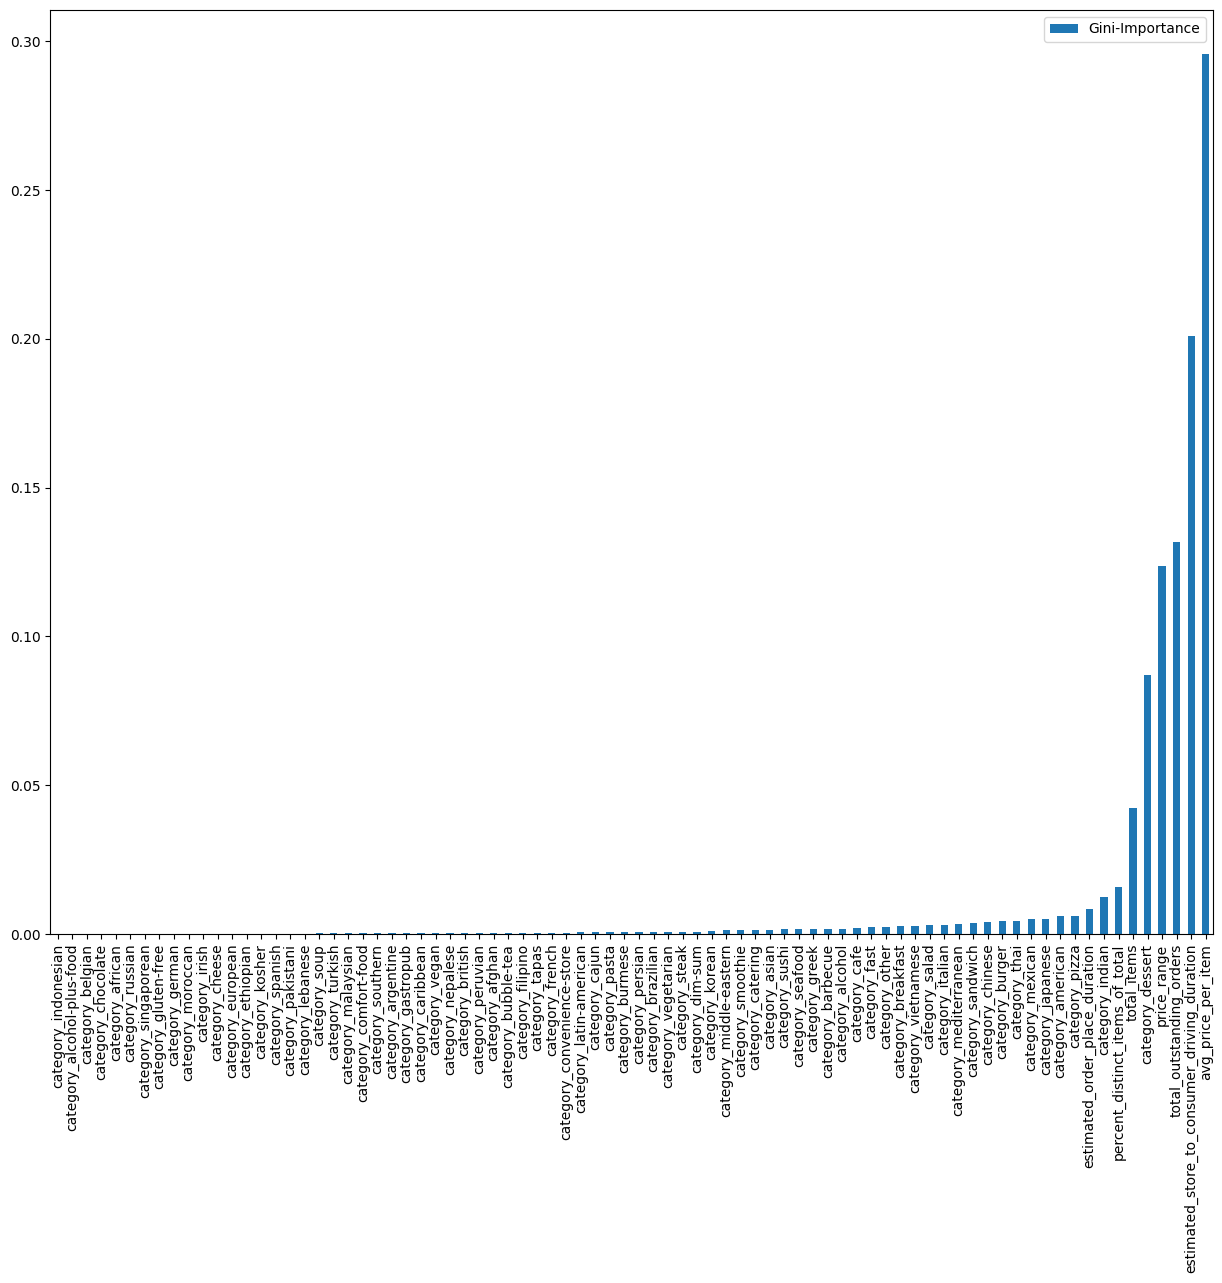

In [167]:
## calculating GINI importance and visualize the result

features_name = [f"feature {i}" for i in range((X.shape[1]))]

## initiating the RandomForestRegressor
rfr = RandomForestRegressor(random_state= 42)

## fitting the model on data
rfr.fit(X_train, y_train)

## dictionary to hold feature names and features importance
feats = {}

for feature, importance in zip(X.columns, rfr.feature_importances_):
    feats[feature] = importance  #add the value pair to the set-value
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns = {0:'Gini-Importance'})
importances.sort_values(by = 'Gini-Importance').plot(kind = 'bar', rot = 90, figsize = (15,12))
plt.show()

In [168]:
## best 35 features as per gini importance

importances.sort_values(by = 'Gini-Importance')[-35:].index.tolist()

['category_korean',
 'category_middle-eastern',
 'category_smoothie',
 'category_catering',
 'category_asian',
 'category_sushi',
 'category_seafood',
 'category_greek',
 'category_barbecue',
 'category_alcohol',
 'category_cafe',
 'category_fast',
 'category_other',
 'category_breakfast',
 'category_vietnamese',
 'category_salad',
 'category_italian',
 'category_mediterranean',
 'category_sandwich',
 'category_chinese',
 'category_burger',
 'category_thai',
 'category_mexican',
 'category_japanese',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'category_indian',
 'percent_distinct_items_of_total',
 'total_items',
 'category_dessert',
 'price_range',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration',
 'avg_price_per_item']

### impotant features using `PCA`

In [169]:
## loading packages for PCA

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler


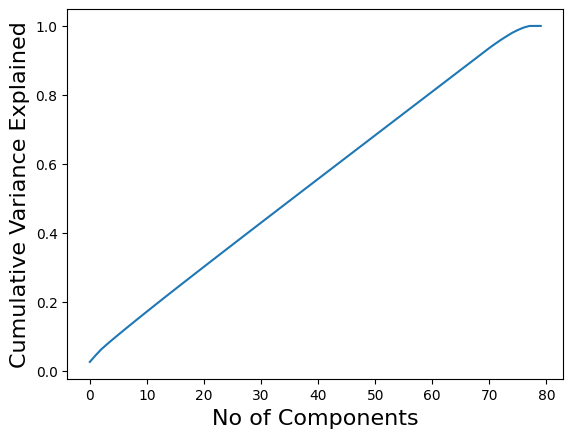

In [170]:
## setting the parameters

X_Train = X_train.values 
X_Train = np.asarray(X_Train) 

## finding normalized array of X_train
X_std = StandardScaler().fit_transform(X_Train)

## initiate and fitting the data into PCA
pca = PCA().fit(X_std)

## plotting the results
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Components", size = 16)
plt.ylabel("Cumulative Variance Explained", size = 16)
plt.show()

**Conclusion** : 
               
   * Almost 80% of the variance can be explained by 60 features     

### `Min-Max Scaler`, `StandardScaler` to scale the data

In [171]:
## loading the packages

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [172]:
## defining custom function to perform scaling

def scaling(scaler, X, y):
    '''Apply selected scaler to features and target column'''
    X_scaler = scaler  #initiating the scaler function for X, features columns
    X_scaler.fit(X = X, y = y)
    X_scaled = X_scaler.transform(X)
    
    y_scaler = scaler # initiating the scaler function for y, target columns
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [173]:
## using the function, scaling

X_scaled, y_scaled, X_scaler, y_scaler = scaling(MinMaxScaler(), X, y)


## splitting the data into training and testing data

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                                                test_size=0.20, random_state=42)

In [174]:
## model performance evaluation

from sklearn.metrics import mean_squared_error

def rmse_with_inv_transformation(scaler, y_pred, y_pred_scaled, model_name):
    """convert the scaled error to actual error"""
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    ## return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared=False)
    print("Error = "'{}'.format(rmse_error) +  ' in ' + model_name)
    
    return rmse_error, y_predict

## Applying Machine Learning models for `prediction`

In [175]:
## importing libraries for machine learning

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors 
from sklearn import linear_model

In [176]:
## creating generic function that can work with multiple ml models

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose = True):
    """Apply selected regression model to the data and measure error"""
    ## fitting the model
    model.fit(X_train, y_train)
    ## predicting the training result and then calculating the error
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    ## predicting the testing result and then calculating the error
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train Error = "'{}'.format(train_error) + ' in ' + model_name)
        print("Test Error = "'{}'.format(test_error) + ' in ' + model_name) 
    trained_model = model
    return trained_model, y_predict, train_error, test_error
        

In [177]:
## creating models for prediction

pred_dict = {
    "regression_model" : [],
    "feature_set" : [],
    "scaler_name" : [],
    "RMSE" : []
}

regression_models = {
    "Ridge" : linear_model.Ridge(),
    "Decision-Tree" : tree.DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "LGBM" : LGBMRegressor(),
    "MLP" : MLPRegressor()
}

feature_sets = {
    "full-dataset" : X.columns.to_list(),
    "selected-features-top-40" : importances.sort_values(by = 'Gini-Importance')[-40:].index.to_list(),
    "selected-features-top-20" : importances.sort_values(by = 'Gini-Importance')[-20:].index.to_list(),
    "selected-features-top-10" : importances.sort_values(by = 'Gini-Importance')[-10:].index.to_list()
}


scalers = {
    "StandardScaler" : StandardScaler(),
    "Min-Max Scaler" : MinMaxScaler(),
    "No Scaler" : None
}

In [178]:
## examine error for each combination of model and parameters

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scaled with {scaler_name} and included column names {feature_set_name}")
        print(" ")
        for model_name in regression_models.keys():
            if scaler_name == "No Scaler":
                X = data[feature_set]
                y = data['actual_total_delivery_duration']
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.20)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = True)
            else:
                X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                                                test_size=0.20, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:, 0], X_test_scaled, y_test_scaled, 
                                                           regression_models[model_name], model_name, verbose = True)
                rmse_error, y_predict = rmse_with_inv_transformation(y_scaler, y_test, y_predict_scaled, model_name) 
                
            # storing the result
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

Scaled with StandardScaler and included column names full-dataset
 
Train Error = 1.0300092697143555 in Ridge
Test Error = 0.6637569069862366 in Ridge
Error = 1094.42578125 in Ridge
Train Error = 0.015579356121576675 in Decision-Tree
Test Error = 0.9358392952902939 in Decision-Tree
Error = 1543.0447769958887 in Decision-Tree
Train Error = 0.39693455138869443 in RandomForest
Test Error = 0.7273593418831213 in RandomForest
Error = 1199.2956912025281 in RandomForest
Train Error = 0.6485507488250732 in XGBoost
Test Error = 0.7462886571884155 in XGBoost
Error = 1230.507080078125 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 144541, number of used features: 70
[LightGBM] [Info] Start training from score 0.00035

C:\Users\saiba\anaconda3\envs\jupyter notebook\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.42007e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1698.316162109375 in Ridge
Test Error = 1094.4237060546875 in Ridge
Train Error = 25.687790865296904 in Decision-Tree
Test Error = 1531.2603864638504 in Decision-Tree
Train Error = 681.9857533925148 in RandomForest
Test Error = 1176.6223399925805 in RandomForest
Train Error = 1045.9947509765625 in XGBoost
Test Error = 1173.593994140625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1356
[LightGBM] [Info] Number of data points in the train set: 144541, number of used features: 70
[LightGBM] [Info] Start training from score 2867.614033
Train Error = 1518.5299144039195 in LGBM
Test Error = 1099.1667160132822 in LGBM
Train Error = 1692.48388671875 in MLP
Test Error = 1081.482421875 in MLP
Scaled with StandardScaler and included column names selected-features

C:\Users\saiba\anaconda3\envs\jupyter notebook\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.68191e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 25.687790865296904 in Decision-Tree
Test Error = 1542.6912335184777 in Decision-Tree
Train Error = 629.5979382646532 in RandomForest
Test Error = 1229.7314815096183 in RandomForest
Train Error = 1071.2515869140625 in XGBoost
Test Error = 1146.7740478515625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 144541, number of used features: 40
[LightGBM] [Info] Start training from score 2867.614033
Train Error = 1518.1429206274179 in LGBM
Test Error = 1105.2783779555425 in LGBM
Train Error = 1694.7547607421875 in MLP
Test Error = 1084.0914306640625 in MLP
Scaled with StandardScaler and included column names selected-features-top-20
 
Train Error = 1.0308910608291626 in Ridge
Test Error = 0.66493821

C:\Users\saiba\anaconda3\envs\jupyter notebook\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.72195e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 25.89180498422854 in Decision-Tree
Test Error = 1534.0784976490945 in Decision-Tree
Train Error = 609.6387479300982 in RandomForest
Test Error = 1213.3799090251048 in RandomForest
Train Error = 1054.852294921875 in XGBoost
Test Error = 1181.3521728515625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1256
[LightGBM] [Info] Number of data points in the train set: 144541, number of used features: 20
[LightGBM] [Info] Start training from score 2867.614033
Train Error = 1516.3933263414906 in LGBM
Test Error = 1111.0290376252592 in LGBM
Train Error = 1694.627197265625 in MLP
Test Error = 1084.718505859375 in MLP
Scaled with StandardScaler and included column names selected-features-top-10
 
Train Error = 1.031970500946045 in Ridge
Test Error = 0.6668145060539

In [179]:
# pred_dict

In [180]:
# data

In [181]:
## storing the result into dataframe

result_df = pd.DataFrame.from_dict(pred_dict)
result_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full-dataset,StandardScaler,1094.425781
1,Decision-Tree,full-dataset,StandardScaler,1543.044777
2,RandomForest,full-dataset,StandardScaler,1199.295691
3,XGBoost,full-dataset,StandardScaler,1230.507080
4,LGBM,full-dataset,StandardScaler,1103.447763
5,MLP,full-dataset,StandardScaler,1081.374268
6,Ridge,full-dataset,Min-Max Scaler,1092.197754
7,Decision-Tree,full-dataset,Min-Max Scaler,1540.812778
8,RandomForest,full-dataset,Min-Max Scaler,1178.412099
9,XGBoost,full-dataset,Min-Max Scaler,1187.766846


In [182]:
result_df[result_df['RMSE'] == np.min(result_df['RMSE'])]

,regression_model,feature_set,scaler_name,RMSE
5,MLP,full-dataset,StandardScaler,1081.374268


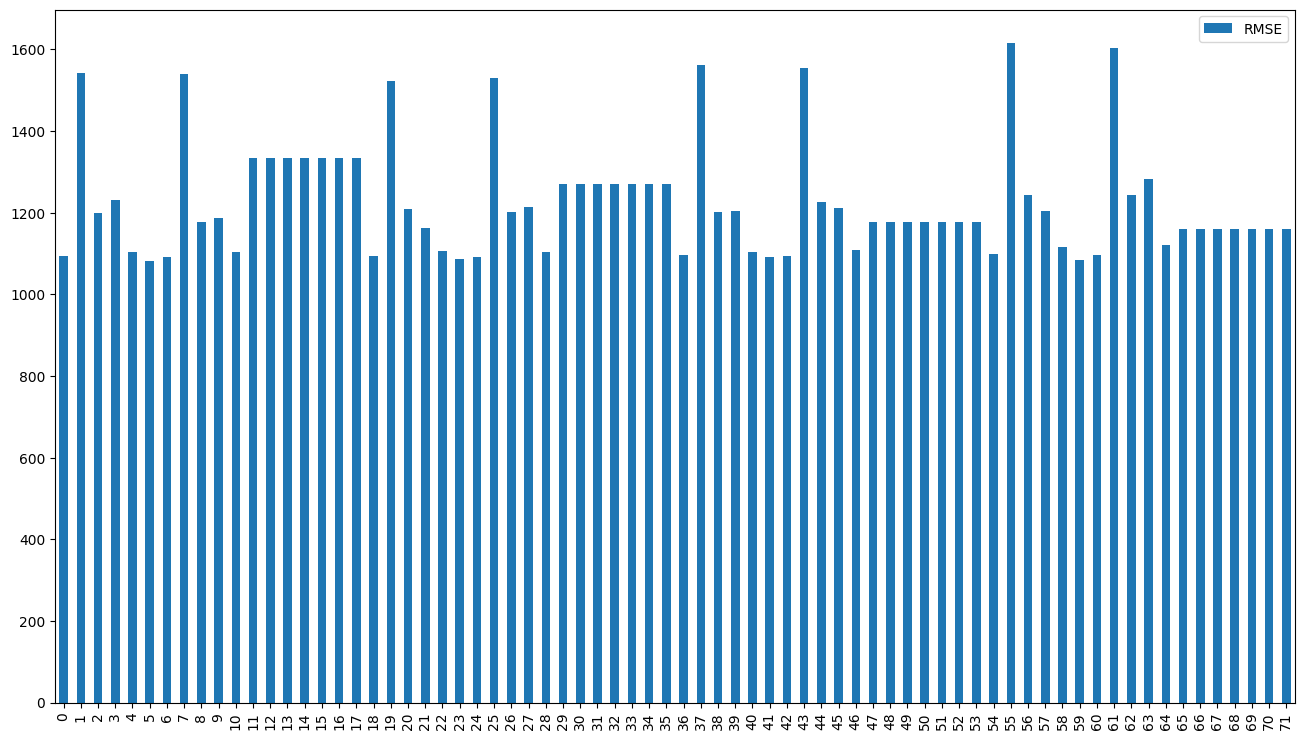

In [183]:
## plotting the result for better understanding

result_df.plot(kind = 'bar', figsize = (16,9))
plt.show()

## changing the peoblem due to high error in current model

**Predict `prep_time` and using the data we will calculate `actual_total_delivery_duration`**

In [184]:
# data.columns

In [189]:
## creating prep_time column

data['prep_time'] = data['actual_total_delivery_duration'] - data['estimated_order_place_duration'] - data['estimated_store_to_consumer_driving_duration']

In [190]:
## as per previous result, we will select Standard Scaler as scaling and top 40 features to build our model

scalers = {
    "Standard Scaler" : StandardScaler()
}

feature_sets = {
    "Selected_top_40_features" : importances.sort_values(by = 'Gini-Importance')[-40:].index.tolist()
}

In [192]:
## examine error for each combination of model and parameters

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scaled with {scaler_name} and included column names {feature_set_name}")
        print(" ")
        for model_name in regression_models.keys():
            # dropping the columns to reduce collinearity
            X = data[feature_set].drop(columns = ['estimated_order_place_duration', 
                                                      'estimated_store_to_consumer_driving_duration'])
            y = data['prep_time']
            
            ## to get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.20)
            train_indices = X_train.index
            test_indices = X_test.index
            
            ## scaling
            X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X, y)
#             make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = True)
#                 X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X[feature_set], y)
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                                                test_size=0.20, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:, 0], X_test_scaled, y_test_scaled, 
                                                           regression_models[model_name], model_name, verbose = True)
            rmse_error, y_predict = rmse_with_inv_transformation(y_scaler, y_test, y_predict_scaled, model_name) 
                
            # storing the result
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)


Scaled with Standard Scaler and included column names Selected_top_40_features
 
Train Error = 1.0466506481170654 in Ridge
Test Error = 0.6754187345504761 in Ridge
Error = 1097.092529296875 in Ridge
Train Error = 0.09620719163147508 in Decision-Tree
Test Error = 0.9707788565434722 in Decision-Tree
Error = 1576.8502771983776 in Decision-Tree
Train Error = 0.42576169508141787 in RandomForest
Test Error = 0.7925895073041326 in RandomForest
Error = 1287.4147106422706 in RandomForest
Train Error = 0.650591254234314 in XGBoost
Test Error = 0.785535454750061 in XGBoost
Error = 1275.9566650390625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 144541, number of used features: 38
[LightGBM] [Info] Start training from

In [ ]:
# data 

**as per the error result, `MLP` will be the best model to choose for further modelling**

In [194]:
## selecting standard scaler for scaling, top-40 features for feature selection and MLP model for modelling

scalers = {
    "StandardScaler" : StandardScaler()
}

feature_sets = {
    "Selected-features-40" : importances.sort_values(by = 'Gini-Importance')[-40:].index.tolist()
}

## continue with best performance model
regression_models = {
    "MLP" : MLPRegressor()
}

## examine error for each combination of model and parameters

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"Scaled with {scaler_name} and included column names {feature_set_name}")
        print(" ")
        for model_name in regression_models.keys():
            # dropping the columns to reduce collinearity
            X = data[feature_set].drop(columns = ['estimated_order_place_duration', 
                                                      'estimated_store_to_consumer_driving_duration'])
            y = data['prep_time']
            
            ## to get indices
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.20)
            train_indices = X_train.index
            test_indices = X_test.index
            
            ## scaling
            X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X, y)
#             make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = True)
#                 X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X[feature_set], y)
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                                                test_size=0.20, random_state=42)
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:, 0], X_test_scaled, y_test_scaled, 
                                                           regression_models[model_name], model_name, verbose = True)
            rmse_error, y_predict = rmse_with_inv_transformation(y_scaler, y_test, y_predict_scaled, model_name) 
                
            # storing the result
            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

Scaled with StandardScaler and included column names Selected-features-40
 
Train Error = 1.0387530326843262 in MLP
Test Error = 0.6703838109970093 in MLP
Error = 1088.914306640625 in MLP


### Choose the best performance model and extract the `prep-duration` predictions

In [198]:
## choose the best performance model and extract the prep-duration predictions

pred_values_dict = {
    "actual_total_delivery_duration" : data['actual_total_delivery_duration'][test_indices].values.tolist(),
    "prep_duration_prediction" : y_predict[:, 0].tolist(),
    "estimated_store_to_consumer_driving_duration" : data['estimated_store_to_consumer_driving_duration'][test_indices].values.tolist(),
    "estimated_order_place_duration" : data["estimated_order_place_duration"][test_indices].values.tolist()
}

In [199]:
# y_predict

In [200]:
## convert the dictionary to dataframe to further analysis

pred_results = pd.DataFrame.from_dict(pred_values_dict)
pred_results

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,3960.0,1769.903687,706.0,251.0
1,3300.0,2104.016846,692.0,251.0
2,2340.0,1608.684692,418.0,251.0
3,3180.0,1936.124512,940.0,251.0
4,2820.0,1584.528076,407.0,251.0
...,...,...,...,...
36131,4440.0,2192.026123,335.0,251.0
36132,4320.0,1733.334473,1013.0,251.0
36133,2940.0,1933.659668,463.0,446.0
36134,3540.0,2305.035400,125.0,251.0


In [203]:
## now our final output `actual_total_delivery_duration` can be accumulated by the addition of rest of the columns

pred_results['predicted_total_delivery_duration'] = pred_results['prep_duration_prediction'] + pred_results['estimated_order_place_duration'] + pred_results['estimated_store_to_consumer_driving_duration']
pred_results

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,predicted_total_delivery_duration
0,3960.0,1769.903687,706.0,251.0,2726.903687
1,3300.0,2104.016846,692.0,251.0,3047.016846
2,2340.0,1608.684692,418.0,251.0,2277.684692
3,3180.0,1936.124512,940.0,251.0,3127.124512
4,2820.0,1584.528076,407.0,251.0,2242.528076
...,...,...,...,...,...
36131,4440.0,2192.026123,335.0,251.0,2778.026123
36132,4320.0,1733.334473,1013.0,251.0,2997.334473
36133,2940.0,1933.659668,463.0,446.0,2842.659668
36134,3540.0,2305.035400,125.0,251.0,2681.035400


In [205]:
## checking the new error after reevaluation 
mean_squared_error(pred_results['actual_total_delivery_duration'], pred_results['predicted_total_delivery_duration'], squared=False)

1088.914250669021

### using another regression model for prediction


In [206]:
pred_results.columns

Index(['actual_total_delivery_duration', 'prep_duration_prediction',
       'estimated_store_to_consumer_driving_duration',
       'estimated_order_place_duration', 'predicted_total_delivery_duration'],
      dtype='object')

In [207]:
X = pred_results[['predicted_total_delivery_duration', 'prep_duration_prediction', 'estimated_store_to_consumer_driving_duration']]
y = pred_results['actual_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

print(X_train.shape, y_test.shape)

(28908, 3) (7228,)


In [209]:
# data.shape

In [212]:
## using different regression models for predictions

regression_models = {
    'Linear-Regression' : linear_model.LinearRegression(),
    'Ridge' : linear_model.Ridge(),
    'Decisiontree' : tree.DecisionTreeRegressor(),
    "Randomforest" : RandomForestRegressor(),
    "LGBM" : LGBMRegressor(),
    "XGBoost" : XGBRegressor(),
    "MLP" : MLPRegressor()
}



for model_name in regression_models.keys():
    _, y_predict, _, _ = make_regression(
        X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = False)
    print("RMSE of : ", model_name, mean_squared_error(y_test, y_predict, squared=False))

RMSE of :  Linear-Regression 1091.0422627420924
RMSE of :  Ridge 1091.0422627581538
RMSE of :  Decisiontree 1495.0120721047017
RMSE of :  Randomforest 1155.4083244813305
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 28908, number of used features: 3
[LightGBM] [Info] Start training from score 2858.922790
RMSE of :  LGBM 1097.508048516402
RMSE of :  XGBoost 1112.4610464939167
RMSE of :  MLP 1091.780676029625


-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

**Conclusion** : The best model for the task is `MLP` again, this will be our final model

## `deep-learning` models for the task

In [215]:
### importing libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(42) 

In [227]:
## creating neural network


def neural_network(feature_set_size):
    
    ## define the model
    model = Sequential()
    model.add(Dense(1024, input_dim = feature_set_size, activation = 'relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    model.add(Dense(1, activation='linear'))
    
    ## compile the model
    model.compile(optimizer='sgd', loss = 'mse',
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

### applying the model for task

In [228]:
print(f"Scaled with {scaler_name} and included columns are {feature_set_name}")
print(" ")


model_name = "ANN"
scaler_name = "StandardScaler"

X = pred_results[['predicted_total_delivery_duration', 'prep_duration_prediction', 'estimated_store_to_consumer_driving_duration']]
y = pred_results['actual_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

## scaling
X_scaled, y_scaled, X_scaler, y_scaler = scaling(scalers[scaler_name], X, y)

## splitting into training and testing the data after scaling
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                                                test_size = 0.20, random_state=42)
print(f"feature-set-size : {X_train_scaled.shape[1]}")

## initialize the model
model = neural_network(feature_set_size = X_train_scaled.shape[1])
history = model.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size = 32, verbose = 2)
y_pred = model.predict(X_test_scaled)

## model evaluation
rmse = rmse_with_inv_transformation(y_scaler, y_test, y_pred, model_name)

# storing the result
pred_dict["regression_model"].append(model_name)
pred_dict["feature_set"].append(feature_set_name)
pred_dict["scaler_name"].append(scaler_name)
pred_dict["RMSE"].append(rmse_error)

Scaled with StandardScaler and included columns are Selected-features-40
 
feature-set-size : 3
Epoch 1/100
904/904 - 3s - loss: 0.9595 - root_mean_squared_error: 0.9796 - 3s/epoch - 3ms/step
Epoch 2/100
904/904 - 3s - loss: 0.8889 - root_mean_squared_error: 0.9428 - 3s/epoch - 3ms/step
Epoch 3/100
904/904 - 3s - loss: 0.8651 - root_mean_squared_error: 0.9301 - 3s/epoch - 3ms/step
Epoch 4/100
904/904 - 3s - loss: 0.8634 - root_mean_squared_error: 0.9292 - 3s/epoch - 3ms/step
Epoch 5/100
904/904 - 3s - loss: 0.8623 - root_mean_squared_error: 0.9286 - 3s/epoch - 3ms/step
Epoch 6/100
904/904 - 3s - loss: 0.8620 - root_mean_squared_error: 0.9284 - 3s/epoch - 3ms/step
Epoch 7/100
904/904 - 3s - loss: 0.8615 - root_mean_squared_error: 0.9282 - 3s/epoch - 3ms/step
Epoch 8/100
904/904 - 3s - loss: 0.8611 - root_mean_squared_error: 0.9280 - 3s/epoch - 4ms/step
Epoch 9/100
904/904 - 4s - loss: 0.8607 - root_mean_squared_error: 0.9278 - 4s/epoch - 4ms/step
Epoch 10/100
904/904 - 4s - loss: 0.8603

Epoch 85/100
904/904 - 3s - loss: 0.8551 - root_mean_squared_error: 0.9247 - 3s/epoch - 3ms/step
Epoch 86/100
904/904 - 3s - loss: 0.8556 - root_mean_squared_error: 0.9250 - 3s/epoch - 3ms/step
Epoch 87/100
904/904 - 3s - loss: 0.8553 - root_mean_squared_error: 0.9248 - 3s/epoch - 3ms/step
Epoch 88/100
904/904 - 3s - loss: 0.8555 - root_mean_squared_error: 0.9250 - 3s/epoch - 3ms/step
Epoch 89/100
904/904 - 3s - loss: 0.8558 - root_mean_squared_error: 0.9251 - 3s/epoch - 3ms/step
Epoch 90/100
904/904 - 3s - loss: 0.8556 - root_mean_squared_error: 0.9250 - 3s/epoch - 3ms/step
Epoch 91/100
904/904 - 3s - loss: 0.8556 - root_mean_squared_error: 0.9250 - 3s/epoch - 4ms/step
Epoch 92/100
904/904 - 3s - loss: 0.8554 - root_mean_squared_error: 0.9249 - 3s/epoch - 3ms/step
Epoch 93/100
904/904 - 3s - loss: 0.8556 - root_mean_squared_error: 0.9250 - 3s/epoch - 3ms/step
Epoch 94/100
904/904 - 3s - loss: 0.8551 - root_mean_squared_error: 0.9247 - 3s/epoch - 4ms/step
Epoch 95/100
904/904 - 3s - lo

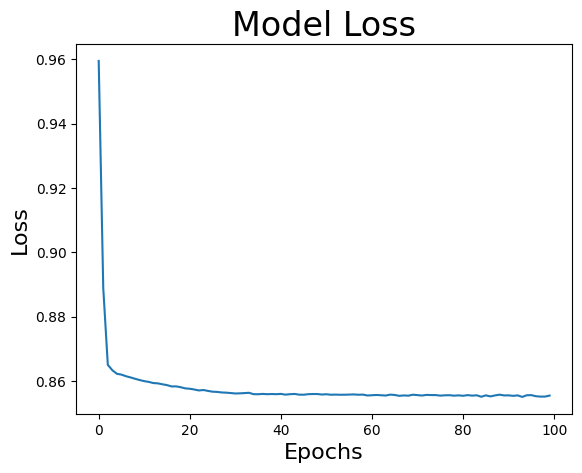

In [229]:
## plotting the result to see the performance of the model

plt.plot(history.history['loss'])
plt.title("Model Loss", size = 24)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Loss", size = 16)
plt.show()

## Conclusion

---------------------------------------------------------------------
```
Final Model for the problem will be `MLP` or `LGBM`
```